### Урок 7
#### Многомерный статистический анализ. Линейная регрессия. 
#### Задача 1

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

* 1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
* 2. Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
* 3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
* 4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
* 5. Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.

In [1]:
import numpy as np
import pandas as pd

In [2]:
x1 = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y1 = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

__1. Коэффициенты линейной регрессии с помощью формул для парной регрессии__

In [3]:
b1 = (np.mean(x1 * y1) - np.mean(x1) * np.mean(y1)) / (np.mean(x1 ** 2) - np.mean(x1) ** 2)
b0 = np.mean(y1) - b1 * np.mean(x1)
b1, b0

(2.620538882402765, 444.1773573243596)

__* Коэффициенты линейной регрессии с помощью метода наименьших квадратов__
$$(X \cdot b - y)^\top \cdot (X \cdot b - y) \rightarrow \min_b$$

In [4]:
x2 = pd.DataFrame(x1)
y2 = pd.DataFrame(y1)
x2

,0
0,35
1,45
2,190
3,200
4,40
5,70
6,54
7,150
8,120
9,110


Добавляем столбец из единиц

In [5]:
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))
x2.shape

(10, 2)

Запишем матрицу  $X^\top X$ и посчитаем её определитель.

In [6]:
X2TX = x2.T.dot(x2)

In [7]:
np.linalg.det(X2TX)

349464.00000000023

Определитель сильно отличается от нуля

In [8]:
X2TX_inv = np.linalg.inv(X2TX)
b = X2TX_inv.dot(x2.T).dot(y2)
print(b)

[[444.17735732]
 [  2.62053888]]


Наша модель линейной регрессии имеет вид:
𝑦=444.2+2.62⋅𝑥

__2. Построим scatter plot по полученным данным и отметим на нём прямую линейной регрессии__

In [9]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'scoring')

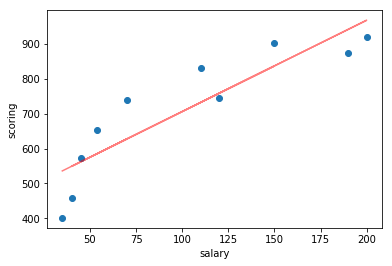

In [10]:
ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('salary')
plt.ylabel('scoring')

__3. Посчитаем коэффициент детерминации и среднюю ошибку аппроксимации.__

In [11]:
z1 = b0 + b1 * x1

print(f'real: {y1[:5]}')
print(f'pred: {z1[:5]}')

real: [401 574 874 919 459]
pred: [535.89621821 562.10160703 942.07974498 968.2851338  548.99891262]


In [12]:
# коэффициент детерминации
R1 = z1.var() / y1.var()
R1

0.7876386635293678

In [13]:
def mean_approximation_error(y_real: np.ndarray, y_pred: np.ndarray) -> float:
    """Средняя ошибка аппроксимации.
    """
    
    return np.abs((y_real - y_pred) / y_real).mean()

In [14]:
# средняя ошибка аппроксимации
mean_approximation_error(y1, z1)

0.11469251843561709

__4. Оценим построенное уравнение регрессии с помощью F-критерия Фишера.__


$$T = \dfrac{R^2}{1 - R^2} \cdot \dfrac{n - k - 1}{k},$$

где $R^2$ - коэффициент детерминации, $n$ - число наблюдений, $k$ - число факторов.


In [15]:
k1 = 1
k2 = 8

T = (R1 / (1 - R1)) * (k2 / k1)
T

29.67164085966437

In [16]:
from scipy import stats

Для уровня значимости $\alpha = 0.05$ посчитаем значение $F_{crit} = F(1, 8)$.

In [17]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

Уравнение регрессии статистически значимо т.к. T > F_crit

__5. Оценим значимость получившихся параметров уравнения регрессии и построем для них доверительные интервалы с помощью t-статистики Стьюдента.__

In [18]:
b0, b1

(444.1773573243596, 2.620538882402765)

In [19]:
def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента наклона.
    """
    
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [20]:
s_slope = standard_error_slope(x1, y1, z1)
s_slope

0.48108279568516005

Зададим уровень значимости $\alpha = 0.05$. В нашем случае $n = 10$, поэтому нас интересует квантиль $t_{1 - 0.05/2, \:8} = 2.306$.

In [21]:
alpha = 0.05

t = stats.t.ppf(1 - alpha / 2, df=8)
t

2.3060041350333704

Гипотеза в нашем случае заключается в том, что коэффициент  𝑏1=0 . Значение статистики  𝑇 :

In [22]:
T = b1 / s_slope
T

5.447168150485579

Интервал критиечской области: $$\Omega_\alpha = \left( -\infty, - t_{1 - \alpha/2, \: n - 2} \right) \cup \left( t_{1 - \alpha/2, \: n - 2}, \infty \right) = \left( -\infty, - 2.306 \right) \cup \left( 2.306, \infty \right).$$

Значение T попало в критическую область, значит, гипотеза о равенстве нулю параметра b1 отвергается.

Доверительный интервал для параметра $b_1$:

In [23]:
(b1 - t * s_slope, b1 + t * s_slope)

(1.5111599662593718, 3.729917798546158)

Теперь для $b_0$:

In [24]:
def standard_error_intercept(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента сдвига.
    """
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [25]:
s_intercept = standard_error_intercept(x1, y1, z1)
s_intercept

56.46649755068153

Значение статистики  𝑇 :

In [26]:
T = b0 / s_intercept
T

7.866210524668863

Значение попало в критическую область, значит, значение параметра  𝑏0  является значимым.

Доверительный интервал для параметра  𝑏0 :

In [27]:
(b0 - t * s_intercept, b0 + t * s_intercept)

(313.9653804816363, 574.3893341670829)

#### Задача 2

Посчитать коэффициенты линейной регрессии для т.н. Квартета Энскомба (см. урок 6).

In [28]:
df = pd.read_csv('anscombe_dataset.csv', encoding='cp1251')
df.head(12)

,id,x1,y1,x2,y2,x3,y3,x4,y4
0,0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [29]:
x1 = df[['x1']].values.T
y1 = df[['y1']].values.T
x2 = df[['x2']].values.T
y2 = df[['y2']].values.T
x3 = df[['x3']].values.T
y3 = df[['y3']].values.T
x4 = df[['x4']].values.T
y4 = df[['y4']].values.T

In [30]:
def KLR_for_anscombe(x, y):
    b1 = (np.mean(x1 * y1) - np.mean(x1) * np.mean(y1)) / (np.mean(x1 ** 2) - np.mean(x1) ** 2)
    b0 = np.mean(y1) - b1 * np.mean(x1)
    return b1, b0

In [31]:
KLR_for_anscombe(x1, y1)

(0.5000909090909076, 3.0000909090909245)

In [32]:
KLR_for_anscombe(x2, y2)

(0.5000909090909076, 3.0000909090909245)

In [33]:
KLR_for_anscombe(x3, y3)

(0.5000909090909076, 3.0000909090909245)

In [34]:
KLR_for_anscombe(x4, y4)

(0.5000909090909076, 3.0000909090909245)

__Коэффициенты совпадают__